In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# knn, метод опорных веторов, логистическая

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [7]:
colum = list()

for c in df.columns:
    if df[c].nunique() >= 10:
        colum.append(c) 
colum

['cap-color', 'gill-color']

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].nunique() <= 4: # and col != 'class':
        col_encoder = pd.Series(label_encoder.fit_transform(df[col]))
        df[col] = col_encoder
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,2,n,1,p,1,0,1,k,...,2,w,w,0,2,1,p,k,s,u
1,0,x,2,y,1,a,1,0,0,k,...,2,w,w,0,2,1,p,n,n,g
2,0,b,2,w,1,l,1,0,0,n,...,2,w,w,0,2,1,p,n,n,m
3,1,x,3,w,1,p,1,0,1,n,...,2,w,w,0,2,1,p,k,s,u
4,0,x,2,g,0,n,1,1,0,k,...,2,w,w,0,2,1,e,n,a,g


In [10]:
df.dtypes

class                        int32
cap-shape                   object
cap-surface                  int32
cap-color                   object
bruises                      int32
odor                        object
gill-attachment              int32
gill-spacing                 int32
gill-size                    int32
gill-color                  object
stalk-shape                  int32
stalk-root                  object
stalk-surface-above-ring     int32
stalk-surface-below-ring     int32
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                    int32
veil-color                   int32
ring-number                  int32
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [11]:
OHE = OneHotEncoder(sparse=False) #ce.TargetEncoder()

for col in df.columns:
    if df[col].nunique() > 4:
        col_encoder = pd.DataFrame(OHE.fit_transform(df[col].values.reshape(-1, 1)))
        df = pd.concat([col_encoder, df], axis = 1)
        df.drop(col, axis = 1, inplace = True)
df.head()

,0,1,2,3,4,5,6,0,1,2,...,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,veil-type,veil-color,ring-number
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,1,0,2,2,0,2,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,2,2,0,2,1
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,0,0,2,2,0,2,1
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,1,0,2,2,0,2,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,1,0,1,2,2,0,2,1


# Разделение выборки

In [12]:
X = df.drop('class', axis = 1)
Y = df['class']
X.shape, Y.shape

((8124, 98), (8124,))

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=17)

In [14]:
x_train.shape, y_train.shape

((5686, 98), (5686,))

In [15]:
x_holdout.shape, y_holdout.shape

((2438, 98), (2438,))

# Логистическая регрессия

In [16]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(x_train, y_train)

LogisticRegression(n_jobs=-1, random_state=7)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score, plot_roc_curve

Accuracy = 0.9991796554552912
AUC ROC = 0.9991554054054055


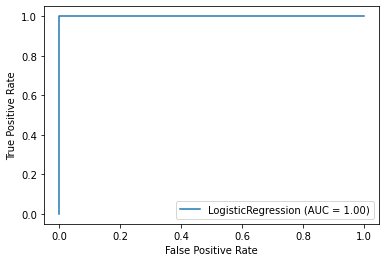

In [18]:
log_pred = logit.predict(x_holdout)

print(f'Accuracy = {accuracy_score(y_holdout, log_pred)}')
print("AUC ROC = {}".format(roc_auc_score(y_holdout, log_pred)))

plot_roc_curve(logit, x_holdout, y_holdout)

# SVM

In [19]:
from sklearn import svm

Accuracy = 1.0
AUC ROC = 1.0


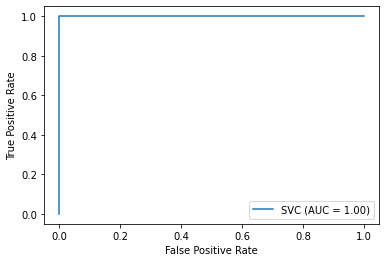

In [20]:
model_svm = svm.SVC(kernel='linear', C=1.0, probability = True)
model_svm.fit(x_train, y_train)
predictions = model_svm.predict(x_holdout)

print(f'Accuracy = {accuracy_score(y_holdout, predictions)}')
print("AUC ROC = {}".format(roc_auc_score(y_holdout, predictions)))

plot_roc_curve(model_svm, x_holdout, y_holdout)

# KNN

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [22]:
%%time

model_knn = KNeighborsClassifier(n_neighbors=5) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(3, 15)) + list(range(20, 30))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(x_train, y_train)
knn_pred = model_knn_grid.predict(x_holdout)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("AUC ROC = {}".format(roc_auc_score(y_holdout, knn_pred)))

Лучшее качество обучение = 1.0
Оптимальное количество соседей = {'n_neighbors': 3}
AUC ROC = 1.0
Wall time: 1min 22s


In [23]:
print(f'Accuracy = {accuracy_score(y_holdout, knn_pred)}')

Accuracy = 1.0


In [196]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [197]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.drop('car_ID', axis = 1, inplace = True)
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [198]:
car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [199]:
car.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [200]:
car_name = dict()
for i in car['CarName']:
    key = ''.join(i.split(' '))
    if key not in car_name.keys():
        car_name[key] = 1
    else:
        car_name[key] += 1
car_name

{'alfa-romerogiulia': 1,
 'alfa-romerostelvio': 1,
 'alfa-romeroQuadrifoglio': 1,
 'audi100ls': 3,
 'audifox': 1,
 'audi5000': 1,
 'audi4000': 1,
 'audi5000s(diesel)': 1,
 'bmw320i': 2,
 'bmwx1': 1,
 'bmwx3': 2,
 'bmwz4': 1,
 'bmwx4': 1,
 'bmwx5': 1,
 'chevroletimpala': 1,
 'chevroletmontecarlo': 1,
 'chevroletvega2300': 1,
 'dodgerampage': 1,
 'dodgechallengerse': 1,
 'dodged200': 1,
 'dodgemonaco(sw)': 1,
 'dodgecolthardtop': 1,
 'dodgecolt(sw)': 1,
 'dodgecoronetcustom': 1,
 'dodgedartcustom': 1,
 'dodgecoronetcustom(sw)': 1,
 'hondacivic': 3,
 'hondaciviccvcc': 2,
 'hondaaccordcvcc': 1,
 'hondaaccordlx': 1,
 'hondacivic1500gl': 1,
 'hondaaccord': 2,
 'hondacivic1300': 1,
 'hondaprelude': 1,
 'hondacivic(auto)': 1,
 'isuzuMU-X': 1,
 'isuzuD-Max': 2,
 'isuzuD-MaxV-Cross': 1,
 'jaguarxj': 1,
 'jaguarxf': 1,
 'jaguarxk': 1,
 'maxdarx3': 1,
 'maxdaglcdeluxe': 1,
 'mazdarx2coupe': 1,
 'mazdarx-4': 2,
 'mazdaglcdeluxe': 2,
 'mazda626': 3,
 'mazdaglc': 2,
 'mazdarx-7gs': 2,
 'mazdaglc4': 1

In [201]:
new_car = list()
for i in car['CarName']:
    key = ''.join(i.split(' '))
    if key in car_name:
        for k in car_name.keys():
            if key == k:
                new_car.append(k)
car['CarName'] = new_car
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romerogiulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romerostelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romeroQuadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi100ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [202]:
car

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romerogiulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romerostelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romeroQuadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi100ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo145e(sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Визаулизация

In [204]:
car['price'].value_counts()

5572.0     2
6692.0     2
7957.0     2
7898.0     2
6229.0     2
          ..
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 189, dtype: int64

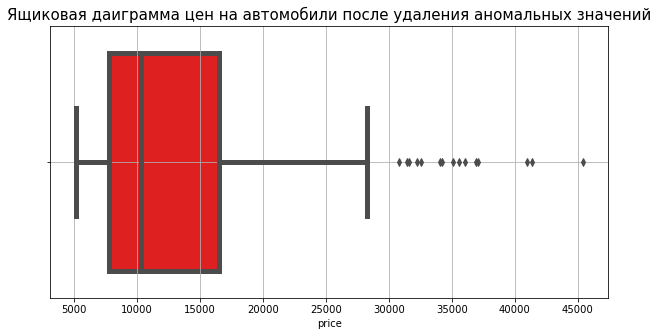

In [205]:
plt.figure(figsize = (10, 5))
sns.boxplot(car['price'], color = 'r', linewidth=5)
plt.title('Ящиковая даиграмма цен на автомобили после удаления аномальных значений', fontsize = 15)
plt.grid(True)

Присутствуют аномальные значения но их не следует удалять, так как по ним делают предсказания, к тому же в ДатаСете не так много данных, чтобы ими разбрасываться

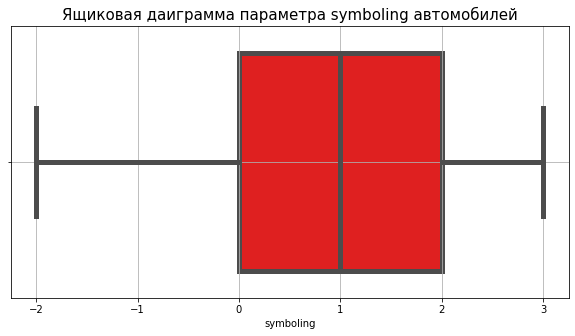

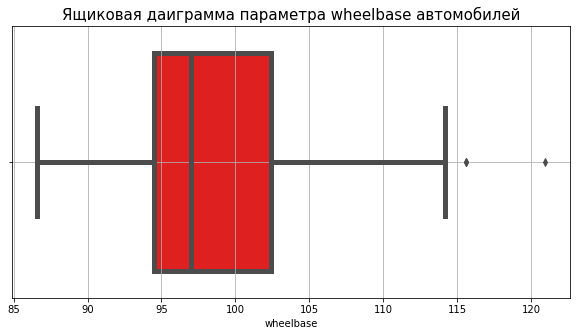

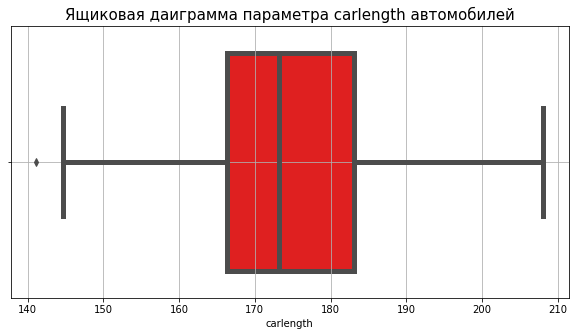

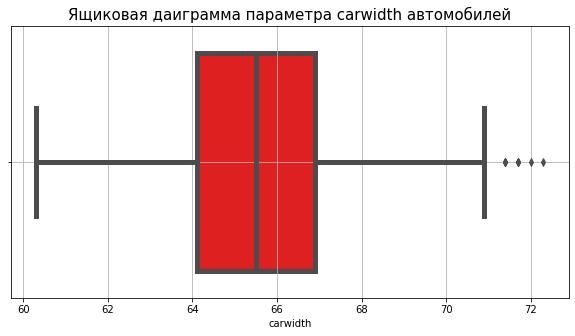

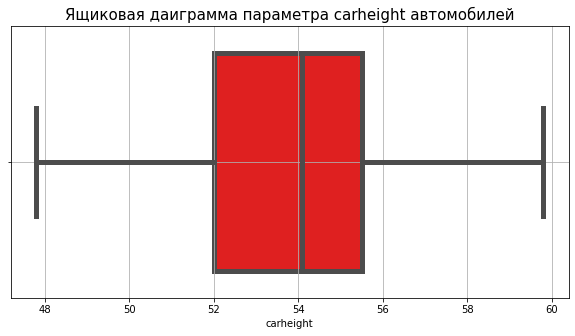

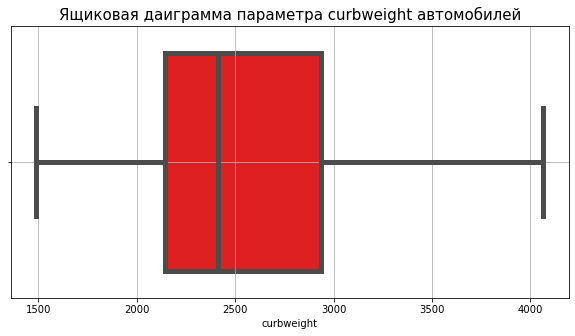

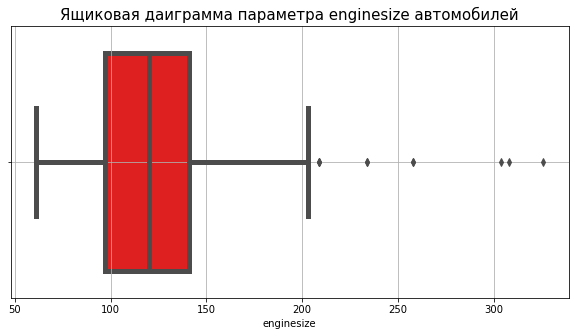

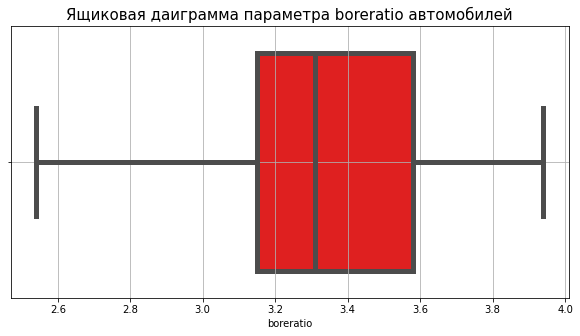

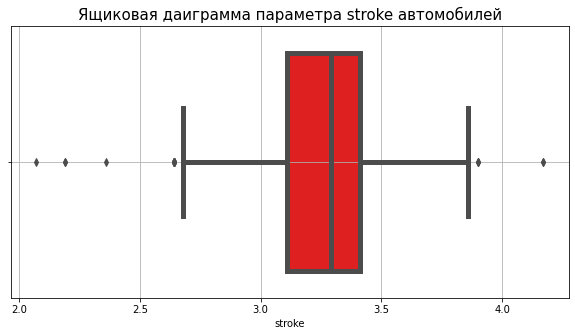

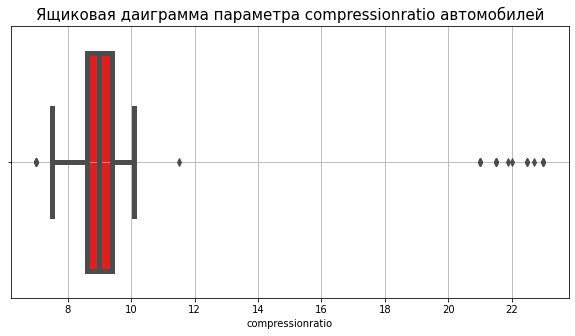

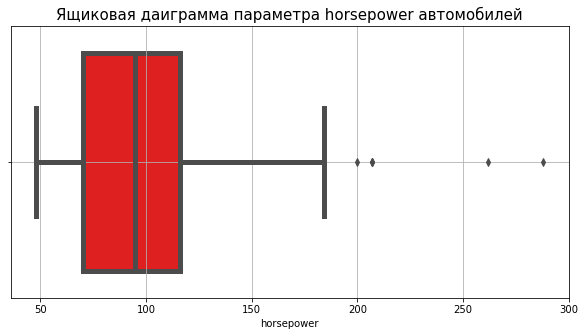

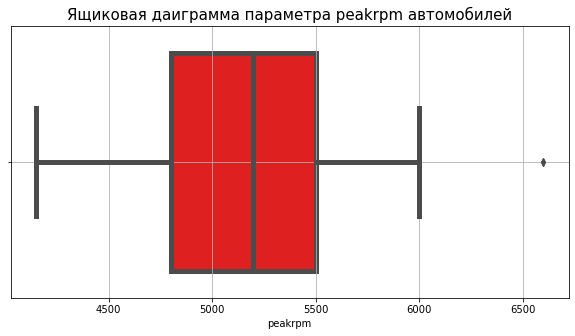

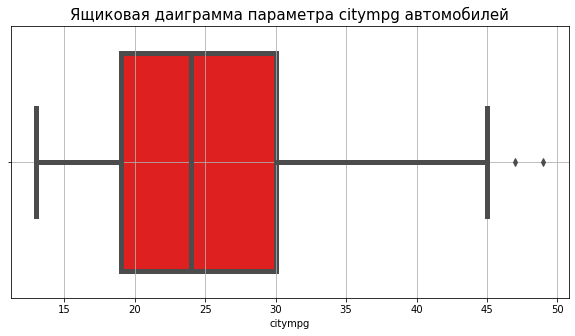

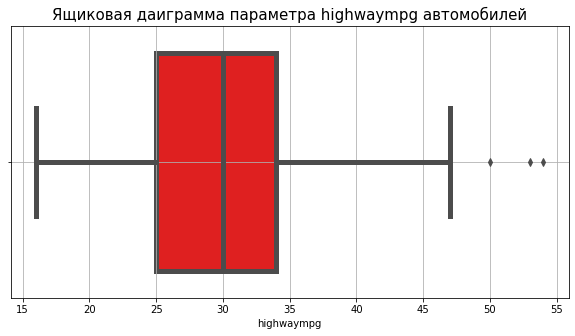

In [208]:
categorical_columns= [column for column in car.columns if car[column].dtype == 'object']
numerical_columns = [column for column in car.columns if car[column].dtype != 'object']

for col in numerical_columns:
    if col != 'price':
        plt.figure(figsize = (10, 5))
        sns.boxplot(car[col], color = 'r', linewidth=5)
        plt.title(f'Ящиковая даиграмма параметра {col} автомобилей', fontsize = 15)
        plt.grid(True)

В каждом признаке выбросы составляют незначительное количество, их либо нет, либо 10 шт. от общего числа признаков, поэтому данные оставим

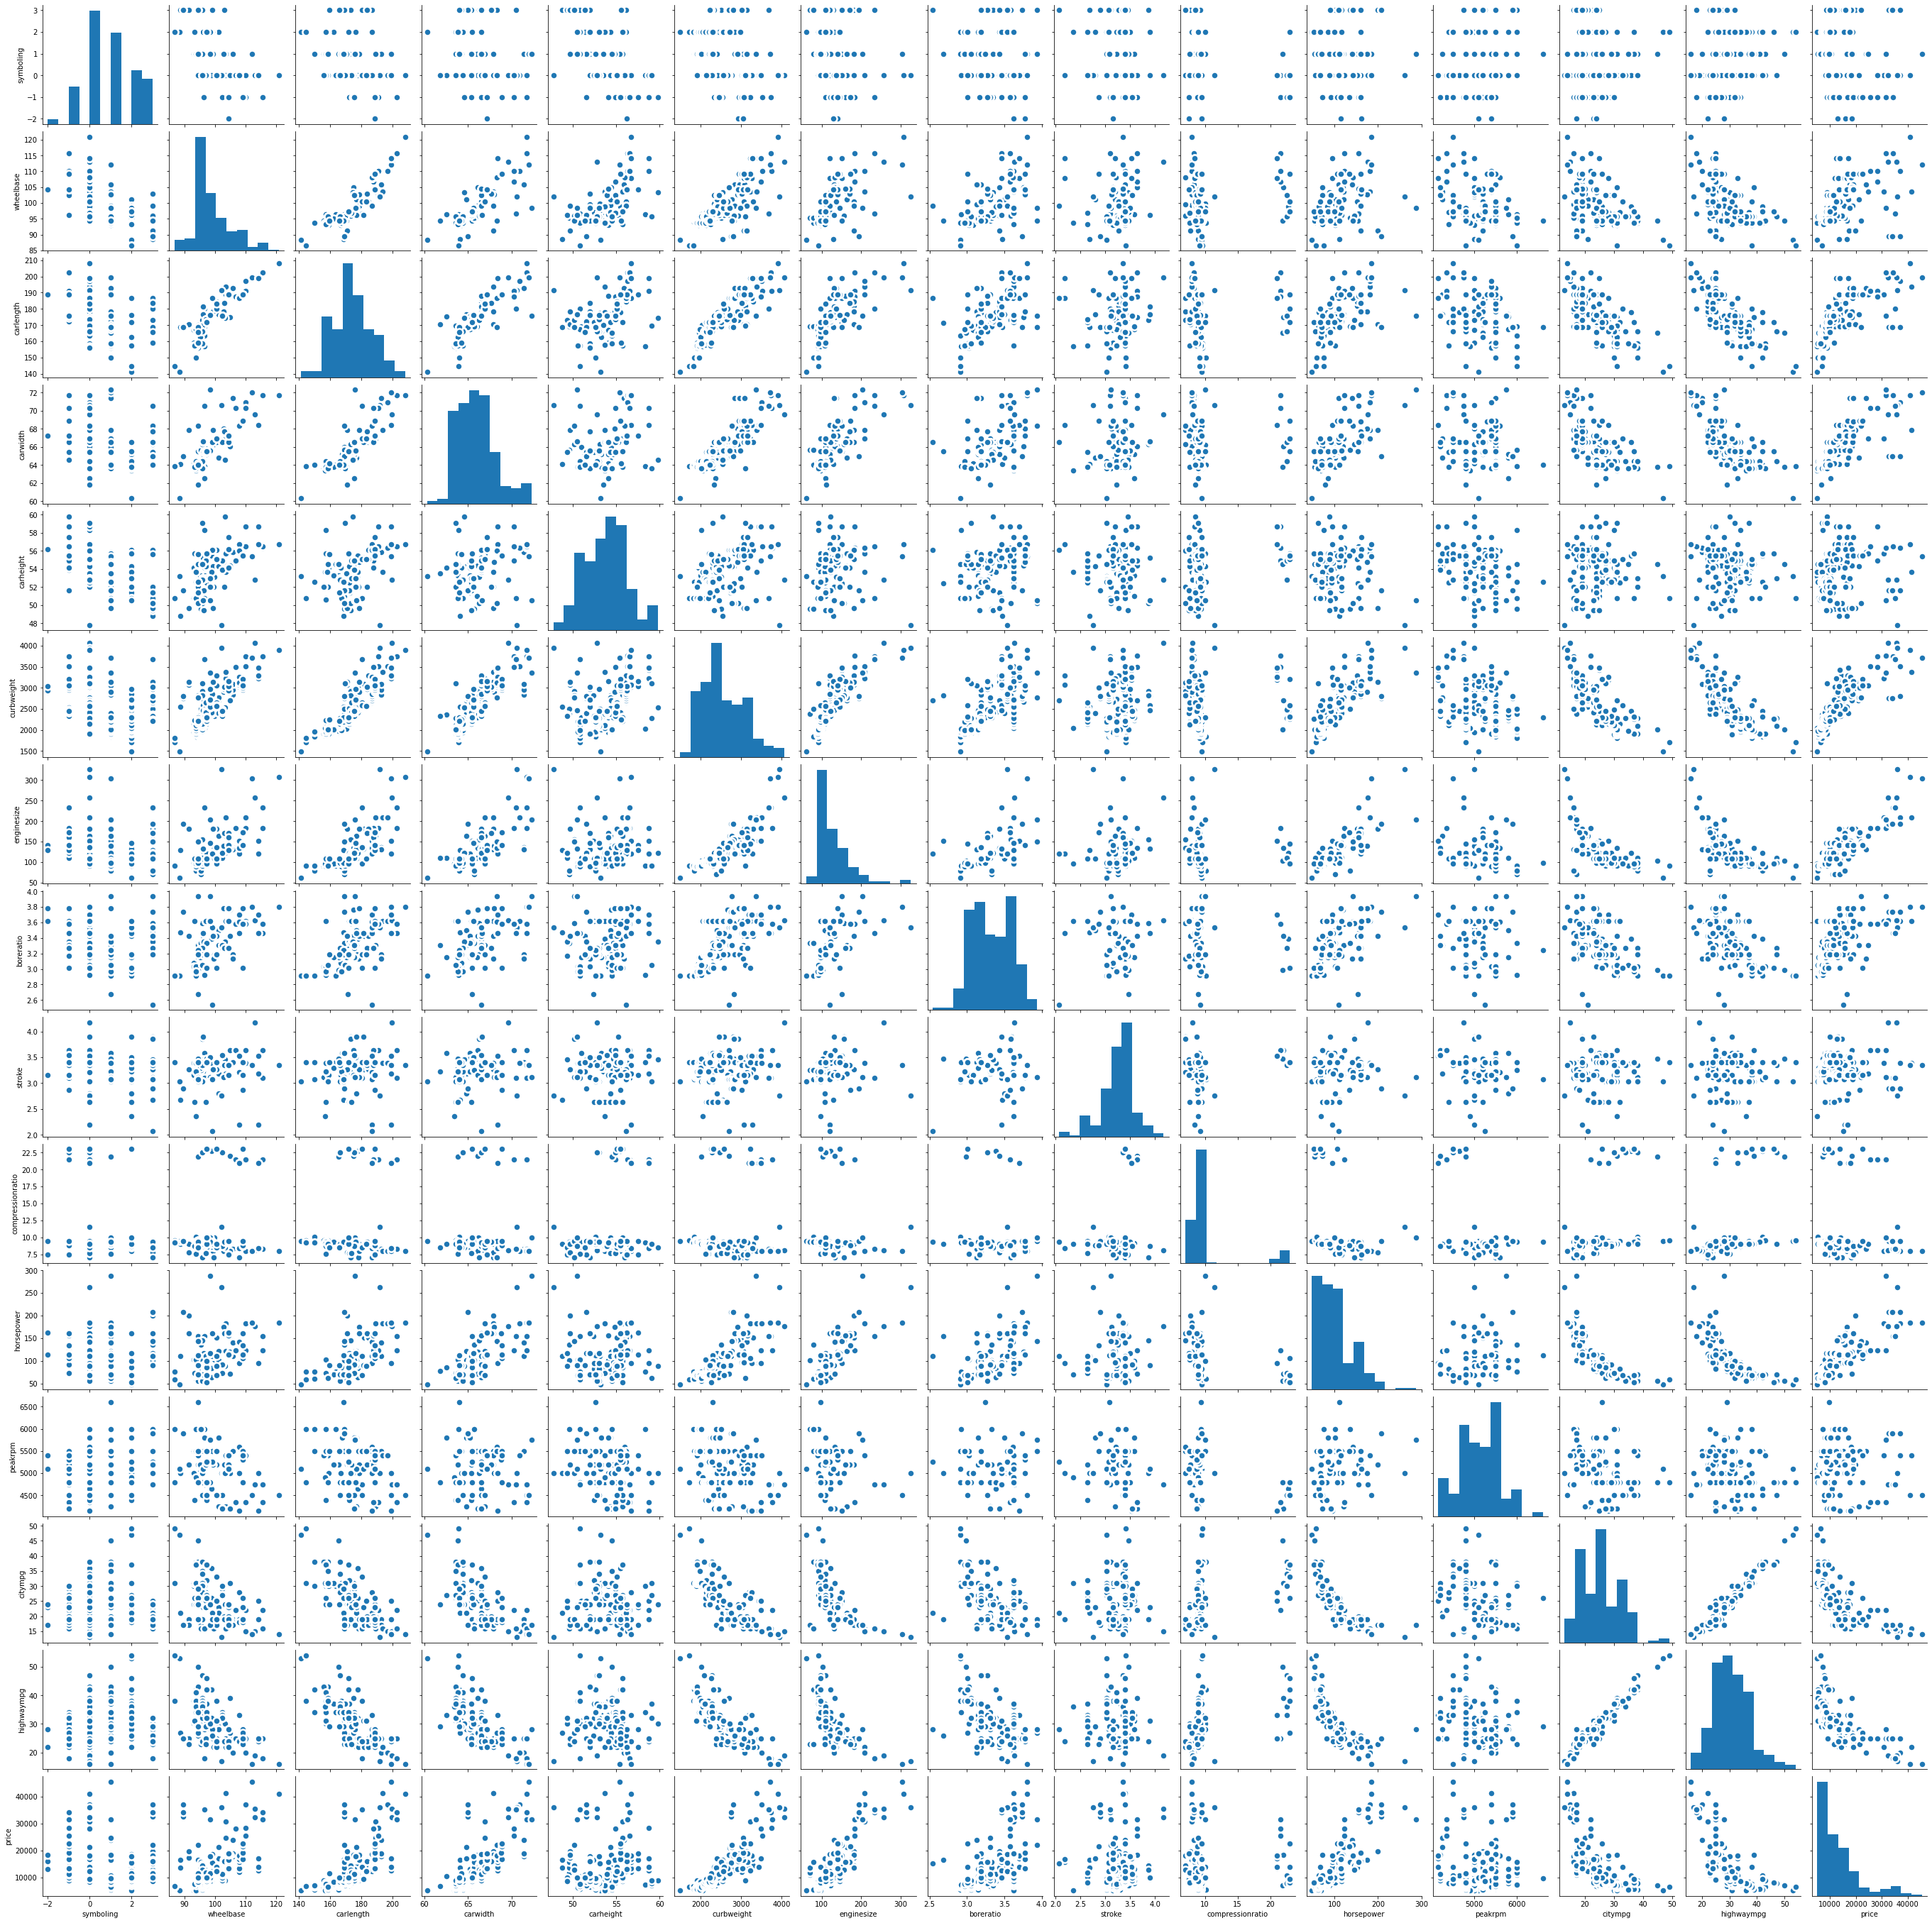

In [211]:
sns.pairplot(car[numerical_columns], kind="scatter", plot_kws=dict(s=100, edgecolor="white", linewidth=2.5))
plt.show()

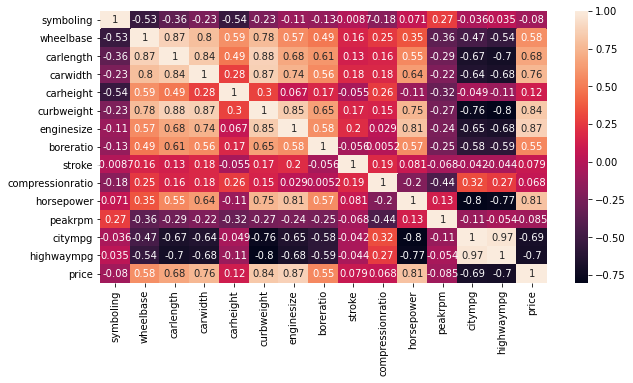

In [214]:
plt.figure(figsize = (10, 5))
sns.heatmap(car[numerical_columns].corr(), annot = True)

Стоит выделить сильно коррелированные данные, которые можно удалить из исходного набора для обучения, чтобы избежать переобучения модели: 
- carlength, 

- carwidth,

- curbweight

In [215]:
car.drop(['carlength', 'carwidth', 'curbweight'], axis = 1, inplace = True)

Данные проанализированы => можно переходить на следующий этап работы

In [218]:
car.nunique()

symboling             6
CarName             146
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carheight            49
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [219]:
categorical_columns= [column for column in car.columns if car[column].dtype == 'object']
numerical_columns = [column for column in car.columns if car[column].dtype != 'object']

In [220]:
label_encoder = LabelEncoder()

for col in categorical_columns:
    if car[col].nunique() <= 4: # and col != 'class':
        col_encoder = pd.Series(label_encoder.fit_transform(car[col]))
        car[col] = col_encoder
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romerogiulia,1,0,1,convertible,2,0,88.6,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romerostelvio,1,0,1,convertible,2,0,88.6,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romeroQuadrifoglio,1,0,1,hatchback,2,0,94.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi100ls,1,0,0,sedan,1,0,99.8,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi100ls,1,0,0,sedan,0,0,99.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [221]:
car.shape

(205, 22)

In [222]:
car_new = car.drop('CarName', axis = 1)
car_new.shape

(205, 21)

In [223]:
car_new.dtypes

symboling             int64
fueltype              int32
aspiration            int32
doornumber            int32
carbody              object
drivewheel            int32
enginelocation        int32
wheelbase           float64
carheight           float64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [224]:
categorical_columns= [column for column in car_new.columns if car_new[column].dtype == 'object']
numerical_columns = [column for column in car_new.columns if car_new[column].dtype != 'object']

categorical_columns

['carbody', 'enginetype', 'cylindernumber', 'fuelsystem']

In [225]:
car_new[categorical_columns].nunique()

carbody           5
enginetype        7
cylindernumber    7
fuelsystem        8
dtype: int64

In [226]:
# можно применить OHE
OHE = OneHotEncoder(sparse=False) #ce.TargetEncoder()

for col in categorical_columns:
    print(col)
    if car_new[col].nunique() > 4:
        col_encoder = pd.DataFrame(OHE.fit_transform(car_new[col].values.reshape(-1, 1)))
        car_new = pd.concat([col_encoder, car_new], axis = 1)
        car_new.drop(col, axis = 1, inplace = True)
car_new.head()

carbody
enginetype
cylindernumber
fuelsystem


,0,1,2,3,4,5,6,7,0,1,...,carheight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,48.8,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,48.8,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,52.4,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,54.3,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,54.3,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [227]:
car_new.shape

(205, 44)

In [228]:
numerical_columns

['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carheight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [229]:
X = car_new.drop('price', axis = 1)
Y = car_new['price']
X.shape, Y.shape

((205, 43), (205,))

In [230]:
from sklearn.model_selection import train_test_split
x_train, x_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=17)

In [231]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
for col in numerical_columns:
    if col != 'price':
        x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1, 1))
        x_holdout[col] = scaler.fit_transform(x_holdout[col].values.reshape(-1, 1))

# Обучение

In [232]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [233]:
def learn(X_train, X_test, Y_train, Y_test, columns, model_name = 'LinearRegression', alphas =[0.5]):
    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) на трейнах = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        return score1, score2, RMSE
    
    elif model_name == 'Ridge':
        if len(alphas) > 1:
            return 'Передайте в гребневую регрессию один гиперпараметр'
        else:
            model = Ridge(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE
 
    elif model_name == 'Lasso':
        if len(alphas) > 1:
            return 'Передайте в Лассо регрессию один гиперпараметр'
        else:
            model = Lasso(alphas[0])
            model.fit(X_train, Y_train)
            score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
            pred = model.predict(X_test)
            score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
            RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
            return score1, score2, RMSE                                      
    
    elif model_name == 'RidgeCV':
        model = RidgeCV(alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha
 
    elif model_name == 'LassoCV':
        model = LassoCV(alphas = alphas)
        model.fit(X_train, Y_train)
        score1 = "Качество модели (R^2) = {}".format(model.score(X_train, Y_train))
        pred = model.predict(X_test)
        score2 = "Качество модели (R^2) на тестовых = {}".format(r2_score(Y_test, pred))
        RMSE = "RMSE = {}".format(mean_squared_error(Y_test, pred, squared = False))
        alpha = 'Идеальное значение альфа = {}'.format(model.alpha_)
        return score1, score2, RMSE, alpha

In [235]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist())

('Качество модели (R^2) на трейнах = 0.9437215913577444',
 'Качество модели (R^2) на тестовых = -1.9910206834437267e+25',
 'RMSE = 3.743634757528532e+16')

In [237]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Ridge', alphas = [100])

('Качество модели (R^2) = 0.49027811233063134',
 'Качество модели (R^2) на тестовых = 0.5138499236411844',
 'RMSE = 5849.79657828639')

In [238]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'Lasso', alphas = [100])

('Качество модели (R^2) = 0.8638490176458049',
 'Качество модели (R^2) на тестовых = 0.8319685808398858',
 'RMSE = 3439.1477389965985')

In [239]:
learn(x_train, x_holdout, y_train, y_holdout, X.columns.tolist(), 
      model_name = 'RidgeCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) = 0.9113098969799439',
 'Качество модели (R^2) на тестовых = 0.8584551974866893',
 'RMSE = 3156.4764130187004',
 'Идеальное значение альфа = 1.010990990990991')

In [240]:
learn(x_train, , y_train, y_holdout, X.columns.tolist(), 
      model_name = 'LassoCV', alphas = np.linspace(0.01, 1000, 1000))

('Качество модели (R^2) = 0.9374358217296164',
 'Качество модели (R^2) на тестовых = 0.8415152639079034',
 'RMSE = 3340.0218311696613',
 'Идеальное значение альфа = 8.017927927927929')

In [241]:
alph = np.linspace(0.01, 1000, 1000)
ElastCV = ElasticNetCV(l1_ratio = 0.6, alphas = alph, cv = 10).fit(x_train, y_train)
pred = ElastCV.predict(x_holdout)
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, pred, squared = False)))
print("Лучшая alpha = {}".format(ElastCV.alpha_))

Качество модели (R^2) на тестовых = 0.8554038951372218
RMSE = 3190.317322708985
Лучшая alpha = 0.01


In [253]:
l1 = {'l1_ratio': np.linspace(0.1, 1, 20)}
model_elast = GridSearchCV(ElastCV, l1,
                          cv = 5,
                          n_jobs = -1, 
                          verbose = False)
model_elast.fit(x_train, y_train)
elast_pred = model_elast.predict(x_holdout)

print("Лучшее качество обучение = {}".format(model_elast.best_score_))
print("Оптимальное l1_ratio = {}".format(model_elast.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_elast.score(x_train, y_train)))
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, elast_pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, elast_pred, squared = False)))

Лучшее качество обучение = 0.8497548959920795
Оптимальное l1_ratio = {'l1_ratio': 0.9052631578947369}
Качество обучения на тренировочных данных R^2 = 0.9392378480741426
Качество модели (R^2) на тестовых = 0.8224131759720015
RMSE = 3535.5823334187735


# Лучшее значение качества обучения среди "штрафовочных" алгоритмов дало  ElastCV:

- R^2 = 0.8554038951372218

- RMSE = 3190.317322708985

In [244]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

In [251]:
%%time
model_knn = KNeighborsRegressor(n_neighbors=10) #Задаем количество соседий на угад
knn_params = {'n_neighbors': list(range(3, 11)) + list(range(20, 31))}
model_knn_grid = GridSearchCV(model_knn, knn_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = False)
model_knn_grid.fit(x_train, y_train)
knn_pred = model_knn_grid.predict(x_holdout)

print("Лучшее качество обучение = {}".format(model_knn_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_knn_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_knn_grid.score(x_train, y_train)))
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, knn_pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, knn_pred, squared = False)))

Лучшее качество обучение = 0.6543473611942812
Оптимальное количество соседей = {'n_neighbors': 3}
Качество обучения на тренировочных данных R^2 = 0.8617020361589578
Качество модели (R^2) на тестовых = 0.8448514927800707
RMSE = 3304.6797986595407
Wall time: 557 ms


In [252]:
model_tree = DecisionTreeRegressor(max_depth=15, random_state=17) #Задаем количество соседий на угад
tree_params = {'max_depth': np.arange(1, 15), 
               'max_features': list(range(1, 20)) + list(range(25, 31))}

model_tree_grid = GridSearchCV(model_tree, tree_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_tree_grid.fit(x_train, y_train)
tree_pred = model_tree_grid.predict(x_holdout)

print("Лучшее качество обучение = {}".format(model_tree_grid.best_score_))
print("Оптимальное количество соседей = {}".format(model_tree_grid.best_params_))
print("Качество обучения на тренировочных данных R^2 = {}".format(model_tree_grid.score(x_train, y_train)))
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, tree_pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, tree_pred, squared = False)))

Fitting 5 folds for each of 350 candidates, totalling 1750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s


Лучшее качество обучение = 0.8529180552867622
Оптимальное количество соседей = {'max_depth': 12, 'max_features': 17}
Качество обучения на тренировочных данных R^2 = 0.9966711128142468
Качество модели (R^2) на тестовых = 0.38308884896736806
RMSE = 6589.718991945306


[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    6.7s finished


# KNN фактически повторила результаты "штрафовочных" алгоритмов, а DT значительтна снизила из в следствие переобучения

In [254]:
from sklearn.ensemble import RandomForestRegressor

In [256]:
%%time

model_tree = RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs = -1) #Задаем количество соседий на угад
forest_params = {'n_estimators': list(range(150, 200))}

model_forest_grid = GridSearchCV(model_tree, forest_params,
                              cv = 5,
                              n_jobs = -1, 
                              verbose = True)

model_forest_grid.fit(x_train, y_train)
forest_pred = model_forest_grid.predict(x_holdout)

print("Лучшее качество обучение = {}".format(model_forest_grid.best_score_))
print("Оптимальное количество деревьвев = {}".format(model_forest_grid.best_params_))
print("Качество модели (R^2) на тестовых = {}".format(r2_score(y_holdout, forest_pred)))
print("RMSE = {}".format(mean_squared_error(y_holdout, forest_pred, squared = False)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.1min finished


Лучшее качество обучение = 0.8783940391712781
Оптимальное количество деревьвев = {'n_estimators': 173}
Качество модели (R^2) на тестовых = 0.8813791618331538
RMSE = 2889.589025256969
Wall time: 1min 5s


# Случайный лес показал лучшее качество среди всех моделей:

- R^2 = 0.8813791618331538

- RMSE = 2889.589025256969

# Форму предсказания можно получить следующим образом:
- сделать ввод параметров пользователя, которые передаются в функцию;

- в функции параметрам, которые не были переданы присваивается медианное значения;

- данные параметры записывается в датасет заключительной строкой;

- производится нормализация и перевод из категорияальных признаков в численные;

- строится модель и предсказываются значения на основе алгоритма Случайных лесов.